# Covariance Matrix Adaptation Evolution Strategy (CMA-ES)

In [190]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D 
import time
import statistics
import seaborn as sns
import cma
import warnings
from scipy.optimize import minimize
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 11})

## Rastrigin function implementation - optimization task 1
#### (https://en.wikipedia.org/wiki/Rastrigin_function)

In [191]:
def rastrigin(X, Y):    
    Z = (X**2 - 10 * np.cos(2 * np.pi * X)) + (Y**2 - 10 * np.cos(2 * np.pi * Y)) + 20
    return Z

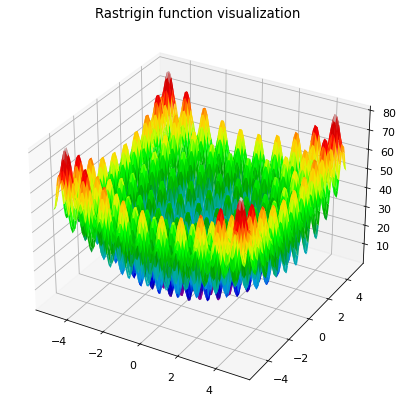

In [192]:
X = np.linspace(-5, 5, 100)     
Y = np.linspace(-5, 5, 100)     
 
X, Y = np.meshgrid(X, Y)
Z=rastrigin(X, Y)
 
fig = plt.figure(figsize=(7,7)) 
ax = fig.gca(projection='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
  cmap=cm.nipy_spectral, linewidth=0.08,
  antialiased=True)    
plt.title('Rastrigin function visualization')
plt.show()

##  Rosenbrock function - optimization task 2
#### (https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.optimize.rosen.html)

In [193]:
def rosenbrock(x,y):
    return (1 + x)**2 + 100*(y - x**2)**2

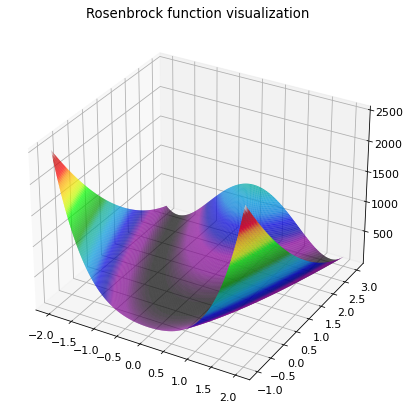

In [194]:
x = np.linspace(-2,2,250)
y = np.linspace(-1,3,250)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

fig = plt.figure(figsize=(7,7)) 
ax = fig.gca(projection='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
  cmap=cm.nipy_spectral, linewidth=0.08,
  antialiased=True)
plt.title('Rosenbrock function visualization')
plt.show()

## CMA-ES implementation tests
#### (https://pypi.org/project/cma/)

In [195]:
import cma
#help(cma.ff) #available test functions

Result tuple contains in the given position and as attribute
   
   - 0 ``xbest`` best solution evaluated
   - 1 ``fbest`` objective function value of best solution
   - 2 ``evals_best`` evaluation count when ``xbest`` was evaluated
   - 3 ``evaluations`` evaluations overall done
   - 4 ``iterations``
   - 5 ``xfavorite`` distribution mean in "phenotype" space, to be
     considered as current best estimate of the optimum
   - 6 ``stds`` effective standard deviations, can be used to
     compute a lower bound on the expected coordinate-wise distance
     to the true optimum, which is (very) approximately stds[i] *
     dimension**0.5 / min(mueff, dimension) / 1.5 / 5 ~ std_i *
     dimension**0.5 / min(popsize / 2, dimension) / 5, where
     dimension = CMAEvolutionStrategy.N and mueff =
     CMAEvolutionStrategy.sp.weights.mueff ~ 0.3 * popsize.
   - 7 ``stop`` termination conditions in a dictionary

### Test with CMA-ES

#### Rosenbrock function

In [ ]:
es = cma.CMAEvolutionStrategy(2 * [0], 0.5)
results=[]
while not es.stop():
    solutions = es.ask()
    es.tell(solutions, [cma.ff.rosen(s) for s in solutions])
    es.disp()
    results.append(es.result_pretty()[1])
values=np.arange(es.result_pretty()[4])

print('___________________________________________')
print(es.result_pretty())
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(values, results)
plt.title('CMA-ES Rosenbrock function')
plt.xlabel('Iterations')
plt.ylabel('Function value')
plt.show()

#### Rastrigin function

In [ ]:
es = cma.CMAEvolutionStrategy(2 * [0], 0.5)
results=[]
while not es.stop():
    solutions = es.ask()
    es.tell(solutions, [cma.ff.rastrigin(s) for s in solutions])
    es.disp()
    results.append(es.result_pretty()[1])
values=np.arange(es.result_pretty()[4])
print('___________________________________________')
print(es.result_pretty())

plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(values, results)
plt.title('CMA-ES Rastrigin function')
plt.xlabel('Iterations')
plt.ylabel('Function value')
plt.show()

#### Happycat function

In [ ]:
es = cma.CMAEvolutionStrategy(2 * [0], 0.5)
results=[]
while not es.stop():
    solutions = es.ask()
    es.tell(solutions, [cma.ff.happycat(s) for s in solutions])
    es.disp()
    results.append(es.result_pretty()[1])
values=np.arange(es.result_pretty()[4])

print('___________________________________________')
print(es.result_pretty())
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(values, results)
plt.title('CMA-ES happycat function')
plt.xlabel('Iterations')
plt.ylabel('Function value')
plt.show()

## Speed tests

#### Rastrigin function

In [ ]:
es = cma.CMAEvolutionStrategy(2 * [0], 0.5)
func_values=[]
time_values=[]
for i in range (100):
    start_time = time.time()
    es.optimize(cma.ff.rastrigin)
    current_time=time.time() - start_time
    time_values.append(current_time)
    func_values.append(es.result_pretty()[1])

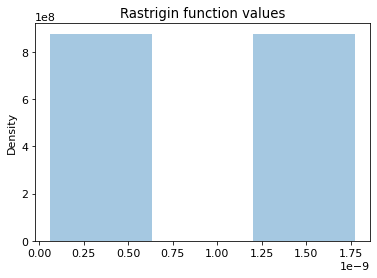

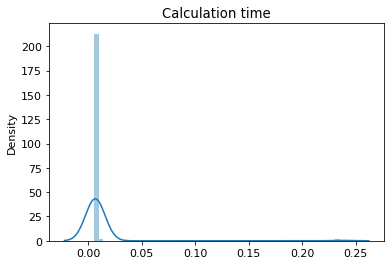

In [222]:
plt.rcParams['figure.figsize'] = [6, 4]
sns.distplot(func_values)
plt.title('Rastrigin function values')
plt.show()
sns.distplot(time_values)
plt.title('Calculation time')
plt.show()

#### Rosenbrock function

In [ ]:
es = cma.CMAEvolutionStrategy(2 * [0], 0.5)
func_values=[]
time_values=[]
for i in range (100):
    start_time = time.time()
    es.optimize(cma.ff.rosen)
    current_time=time.time() - start_time
    time_values.append(current_time)
    func_values.append(es.result_pretty()[1])

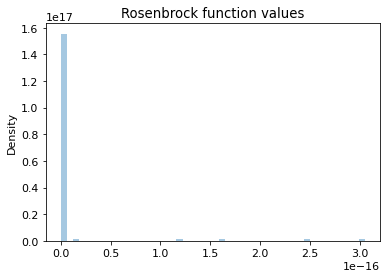

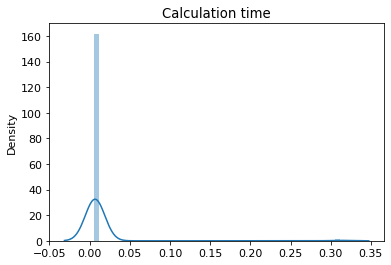

In [225]:
plt.rcParams['figure.figsize'] = [6, 4]
sns.distplot(func_values)
plt.title('Rosenbrock function values')
plt.show()
sns.distplot(time_values)
plt.title('Calculation time')
plt.show()

#### Happycat function

In [ ]:
es = cma.CMAEvolutionStrategy(2 * [0], 0.5)
func_values=[]
time_values=[]
for i in range (100):
    start_time = time.time()
    es.optimize(cma.ff.happycat)
    current_time=time.time() - start_time
    time_values.append(current_time)
    func_values.append(es.result_pretty()[1])

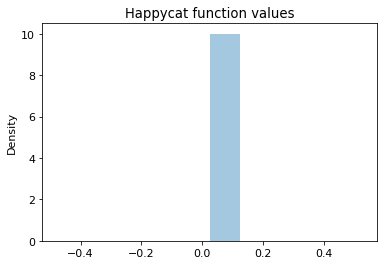

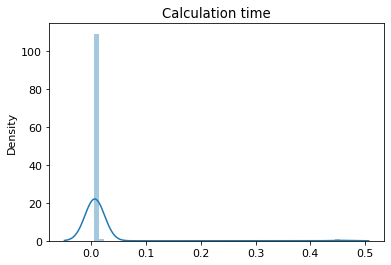

In [227]:
plt.rcParams['figure.figsize'] = [6, 4]
sns.distplot(func_values)
plt.title('Happycat function values')
plt.show()
sns.distplot(time_values)
plt.title('Calculation time')
plt.show()

### Test with simple genetic algorithm
#### https://pypi.org/project/geneticalgorithm/

In [240]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

#### Rastrigin function

In [ ]:
varbound=np.array([[-5,5]]*2)
params={'max_num_iteration': 500, 
        'population_size': 100, 
        'mutation_probability': 0.1, 
        'elit_ratio': 0.01, 
        'crossover_probability': 0.5, 
        'parents_portion': 0.3, 
        'crossover_type': 'uniform', 
        'max_iteration_without_improv': 50}
model=ga(function=cma.ff.rastrigin, 
         dimension=2,
         variable_type='real',
         variable_boundaries=varbound,
         algorithm_parameters=params)


func_values=[]
time_values=[]
for i in range (50):
    start_time = time.time()
    model.run()
    current_time=time.time() - start_time
    time_values.append(current_time)
    func_values.append(model.output_dict['function'])

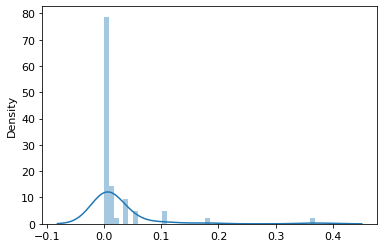

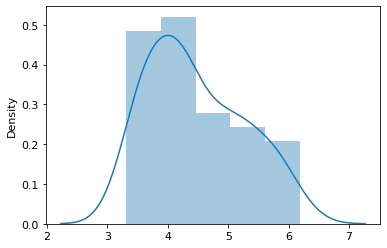

In [206]:
plt.rcParams['figure.figsize'] = [6, 4]
sns.distplot(func_values)
plt.show()
sns.distplot(time_values)
plt.show()

#### Rosenbrock function

In [ ]:
varbound=np.array([[-5,5]]*2)
params={'max_num_iteration': 500, 
        'population_size': 100, 
        'mutation_probability': 0.1, 
        'elit_ratio': 0.01, 
        'crossover_probability': 0.5, 
        'parents_portion': 0.3, 
        'crossover_type': 'uniform', 
        'max_iteration_without_improv': 50}
model=ga(function=cma.ff.rosen, 
         dimension=2,
         variable_type='real',
         variable_boundaries=varbound,
         algorithm_parameters=params)
func_values=[]
time_values=[]
for i in range (50):
    start_time = time.time()
    model.run()
    current_time=time.time() - start_time
    time_values.append(current_time)
    func_values.append(model.output_dict['function'])

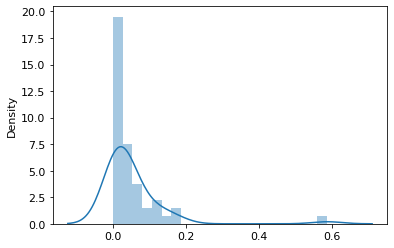

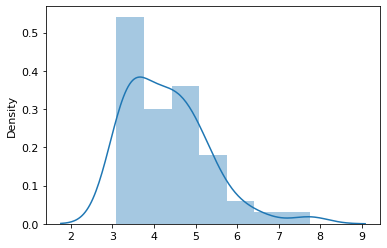

In [208]:
plt.rcParams['figure.figsize'] = [6, 4]
sns.distplot(func_values)
plt.show()
sns.distplot(time_values)
plt.show()

#### Happycat function

In [ ]:
varbound=np.array([[-2,2]]*2)
params={'max_num_iteration': 500, 
        'population_size': 100, 
        'mutation_probability': 0.1, 
        'elit_ratio': 0.01, 
        'crossover_probability': 0.5, 
        'parents_portion': 0.3, 
        'crossover_type': 'uniform', 
        'max_iteration_without_improv': 50}
model=ga(function=cma.ff.happycat, 
         dimension=2,
         variable_type='real',
         variable_boundaries=varbound,
         algorithm_parameters=params)


func_values=[]
time_values=[]
for i in range (50):
    start_time = time.time()
    model.run()
    current_time=time.time() - start_time
    time_values.append(current_time)
    func_values.append(model.output_dict['function'])

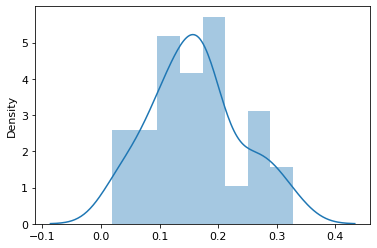

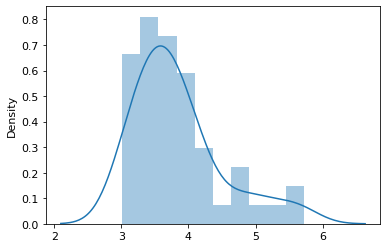

In [210]:
plt.rcParams['figure.figsize'] = [6, 4]
sns.distplot(func_values)
plt.show()
sns.distplot(time_values)
plt.show()

### Test with differential evolution

#### Rastrigin function

In [211]:
from scipy.optimize import differential_evolution

bounds = [(-5, 5), (-5, 5)]
func_values=[]
time_values=[]
for i in range (50):
    start_time = time.time()
    result = differential_evolution(cma.ff.rastrigin, bounds)
    current_time=time.time() - start_time
    time_values.append(current_time)
    func_values.append(result['fun'])

print(result)

     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 1983
     nit: 65
 success: True
       x: array([-7.88588084e-10, -3.42713025e-09])


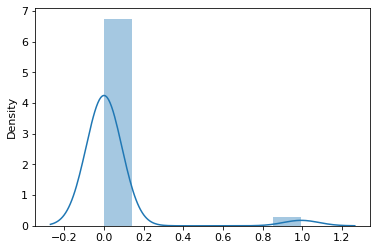

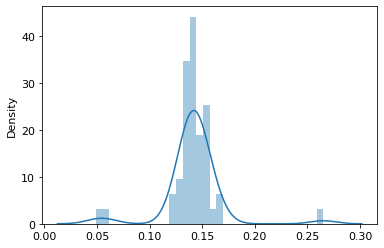

In [212]:
plt.rcParams['figure.figsize'] = [6, 4]
sns.distplot(func_values)
plt.show()
sns.distplot(time_values)
plt.show()

#### Rosenbrock function

In [213]:
bounds = [(-5, 5), (-5, 5)]
func_values=[]
time_values=[]
for i in range (50):
    start_time = time.time()
    result = differential_evolution(cma.ff.rosen, bounds)
    current_time=time.time() - start_time
    time_values.append(current_time)
    func_values.append(result['fun'])
print(result)

     fun: 4.979684464207637e-30
 message: 'Optimization terminated successfully.'
    nfev: 3693
     nit: 122
 success: True
       x: array([1., 1.])


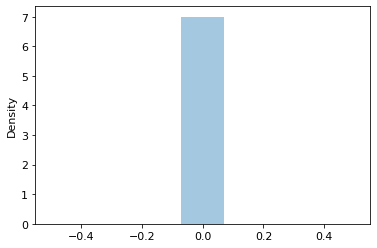

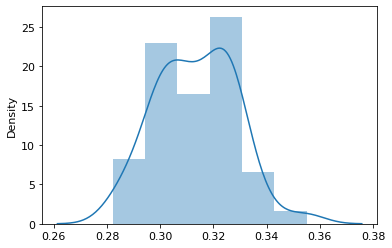

In [214]:
plt.rcParams['figure.figsize'] = [6, 4]
sns.distplot(func_values)
plt.show()
sns.distplot(time_values)
plt.show()

#### Happycat function

In [215]:
bounds = [(-2, 2), (-2, 2)]
func_values=[]
time_values=[]
for i in range (50):
    start_time = time.time()
    result = differential_evolution(cma.ff.happycat, bounds)
    current_time=time.time() - start_time
    time_values.append(current_time)
    func_values.append(result['fun'])
print(result)

     fun: 0.005039357553498269
 message: 'Optimization terminated successfully.'
    nfev: 4083
     nit: 133
 success: True
       x: array([-0.8946944 , -1.09522689])


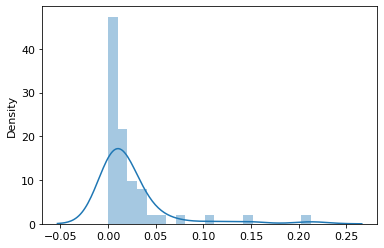

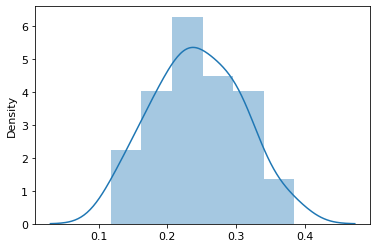

In [216]:
plt.rcParams['figure.figsize'] = [6, 4]
sns.distplot(func_values)
plt.show()
sns.distplot(time_values)
plt.show()

## Test with conjugate gradient 

#### Rastrigin function

In [ ]:
func_values=[]
time_values=[]
for i in range (50):
    start_time = time.time()
    result = minimize(cma.ff.rastrigin, [-2, 1], method='CG', options={'disp': True})
    current_time=time.time() - start_time
    time_values.append(current_time)
    func_values.append(result['fun'])
print(results)

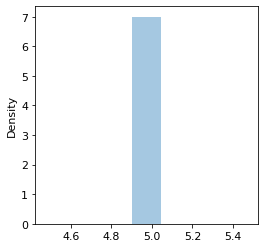

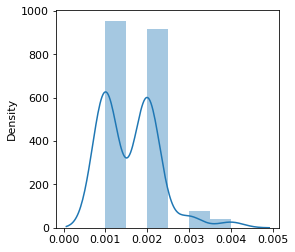

In [218]:
plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(func_values)
plt.show()
sns.distplot(time_values)
plt.show()

#### Rosenbrock function

In [ ]:
func_values=[]
time_values=[]
for i in range (50):
    start_time = time.time()
    result = minimize(cma.ff.rosen, [-5, -1], method='CG', options={'disp': True})
    current_time=time.time() - start_time
    time_values.append(current_time)
    func_values.append(result['fun'])

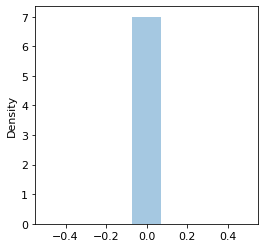

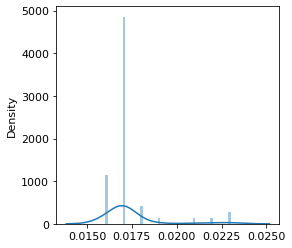

In [220]:
plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(func_values)
plt.show()
sns.distplot(time_values)
plt.show()